In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("pizza sales.csv")

In [3]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [6]:
df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
33821,33822,14937,southw_ckn_l,1,9/7/2015,14:47:30,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
35094,35095,15496,ckn_pesto_l,1,9/16/2015,14:29:23,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza
35662,35663,15743,thai_ckn_m,1,9/20/2015,16:37:12,16.75,16.75,M,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
47402,47403,20834,cali_ckn_l,1,12/20/2015,13:00:50,20.75,20.75,L,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza
1440,1441,640,cali_ckn_s,1,1/11/2015,13:28:08,12.75,12.75,S,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",The California Chicken Pizza


In [7]:
def understand_data(df):
    """
    Performs initial data exploration and prints descriptive statistics.

    Args:
        df (pandas.DataFrame): The input DataFrame.
    """
    if df is None:
        return

    print("\n--- Data Overview ---")
    print(df.head())
    print("\n--- Data Info ---")
    print(df.info())
    print("\n--- Descriptive Statistics ---")
    print(df.describe())

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

#### Missing Values

In [11]:
df.isna().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [12]:
df.describe(include='all')

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,11/26/2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


In [13]:
print("The length of the dataset is", df.shape)

The length of the dataset is (48620, 12)


#### Explore categorical columns

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n--- Unique Values in {col} ---")
    print(df[col].unique())
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts())


--- Unique Values in pizza_id ---
['hawaiian_m' 'classic_dlx_m' 'five_cheese_l' 'ital_supr_l' 'mexicana_m'
 'thai_ckn_l' 'ital_supr_m' 'prsc_argla_l' 'bbq_ckn_s' 'the_greek_s'
 'spinach_supr_s' 'classic_dlx_s' 'green_garden_s' 'ital_cpcllo_l'
 'ital_supr_s' 'mexicana_s' 'spicy_ital_l' 'spin_pesto_l' 'veggie_veg_s'
 'mexicana_l' 'southw_ckn_l' 'bbq_ckn_l' 'cali_ckn_l' 'cali_ckn_m'
 'pepperoni_l' 'cali_ckn_s' 'ckn_pesto_l' 'big_meat_s' 'soppressata_l'
 'four_cheese_l' 'napolitana_s' 'calabrese_m' 'four_cheese_m'
 'ital_veggie_s' 'mediterraneo_m' 'peppr_salami_s' 'spinach_fet_l'
 'napolitana_l' 'sicilian_l' 'ital_cpcllo_m' 'southw_ckn_s' 'bbq_ckn_m'
 'pepperoni_m' 'prsc_argla_s' 'sicilian_m' 'veggie_veg_l' 'ckn_alfredo_s'
 'pepperoni_s' 'green_garden_l' 'green_garden_m' 'pep_msh_pep_l'
 'hawaiian_s' 'peppr_salami_m' 'ckn_alfredo_m' 'peppr_salami_l'
 'spin_pesto_s' 'thai_ckn_m' 'classic_dlx_l' 'ckn_pesto_m' 'the_greek_xl'
 'hawaiian_l' 'pep_msh_pep_s' 'spinach_supr_m' 'prsc_argla_m'
 'med

#### 3. Data Preparation

In [17]:
def prepare_data(df):
    """
    Prepares the data for machine learning.  This includes:
    - Handling missing values
    - Converting data types
    - Feature engineering (date/time features)
    - One-hot encoding categorical variables
    - Feature Scaling

    Args:
        df (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The prepared DataFrame, or None if input is None.
    """
    if df is None:
        return None

In [18]:
df_prepared = df.copy()

#### Handling Missing Values
Imputing missing values using SimpleImputer

In [20]:
numeric_cols = df_prepared.select_dtypes(include=np.number).columns
categorical_cols = df_prepared.select_dtypes(include=['object']).columns

In [21]:
if len(numeric_cols) > 0:
    imputer_numeric = SimpleImputer(strategy='mean')
    df_prepared[numeric_cols] = imputer_numeric.fit_transform(df_prepared[numeric_cols])

In [22]:
if len(categorical_cols) > 0:
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    df_prepared[categorical_cols] = imputer_categorical.fit_transform(df_prepared[categorical_cols])

In [23]:
print("\nMissing values handled.")


Missing values handled.


#### Convert Data Types

In [25]:
df_prepared['order_date'] = pd.to_datetime(df_prepared['order_date'], format='mixed', dayfirst=True)
df_prepared['order_time'] = pd.to_datetime(df_prepared['order_time'], format='%H:%M:%S').dt.time

#### Feature Engineering

In [55]:
df_prepared['day_of_week'] = df_prepared['order_date'].dt.day_name()
df_prepared['month'] = df_prepared['order_date'].dt.month
df_prepared['hour'] = [t.hour for t in df_prepared['order_time']] # Extract hour

#### One-Hot Encode Categorical Variables

In [57]:
categorical_cols_to_encode = ['pizza_size', 'pizza_category', 'pizza_name', 'day_of_week']  # Include day_of_week
df_processed = pd.get_dummies(df_prepared, columns=categorical_cols_to_encode, drop_first=True) #drop_first to handle multicollinearity

In [59]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


#### Drop original categorical columns and other unneeded columns

In [61]:
columns_to_drop = ['order_id', 'pizza_id', 'order_time', 'pizza_ingredients']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore'
print("Data preparation complete.")

Data preparation complete.


In [69]:
df_processed, df_prepared.head()

(       order_details_id  quantity order_date  unit_price  total_price  month  \
 0                   1.0       1.0 2015-01-01       13.25        13.25      1   
 1                   2.0       1.0 2015-01-01       16.00        16.00      1   
 2                   3.0       1.0 2015-01-01       18.50        18.50      1   
 3                   4.0       1.0 2015-01-01       20.75        20.75      1   
 4                   5.0       1.0 2015-01-01       16.00        16.00      1   
 ...                 ...       ...        ...         ...          ...    ...   
 48615           48616.0       1.0 2015-12-31       16.75        16.75     12   
 48616           48617.0       1.0 2015-12-31       17.95        17.95     12   
 48617           48618.0       1.0 2015-12-31       12.00        12.00     12   
 48618           48619.0       1.0 2015-12-31       20.25        20.25     12   
 48619           48620.0       1.0 2015-12-31       12.75        12.75     12   
 
        hour  pizza_size_M

#### 4. Exploratory Data Analysis (EDA)

In [71]:
def explore_data(df, df_original):
    """
    Performs exploratory data analysis and visualizes key patterns.

    Args:
        df (pandas.DataFrame): The preprocessed DataFrame.
        df_original (pandas.DataFrame): The original DataFrame.
    """
    if df is None or df_original is None:
        return

    print("\n--- Exploratory Data Analysis ---")

#### Sales Trends Over Time

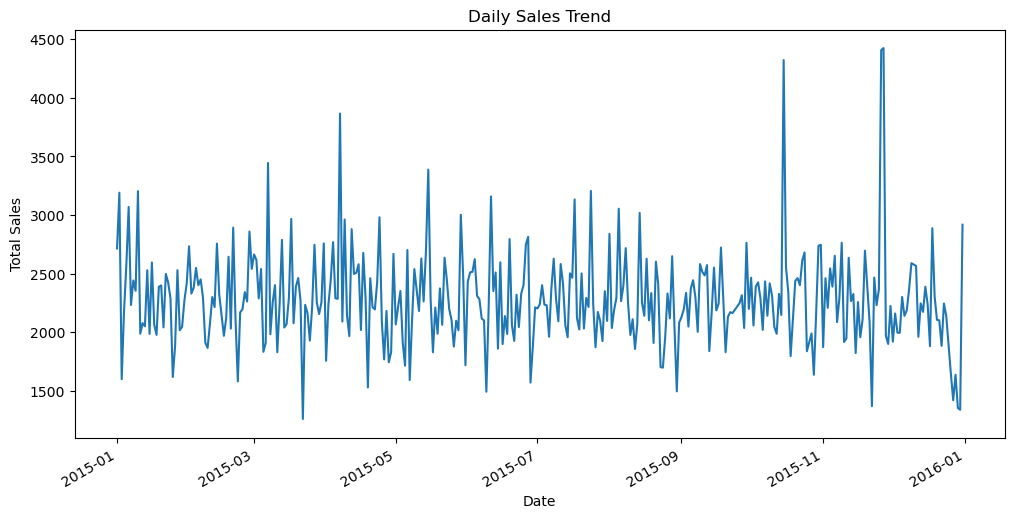

In [83]:
plt.figure(figsize=(12, 6))
df_temp = df.copy()
df_temp['order_date'] = pd.to_datetime(df_temp['order_date'], format='mixed', dayfirst=True)
daily_sales = df_temp.groupby('order_date')['total_price'].sum()
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### Sales by Pizza Category

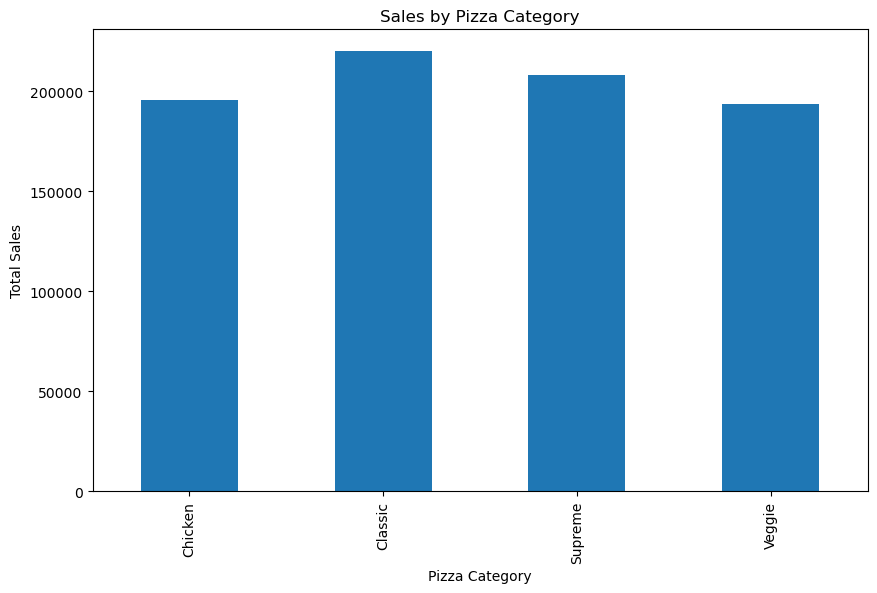

In [77]:
plt.figure(figsize=(10, 6))
category_sales = df.groupby('pizza_category')['total_price'].sum()
category_sales.plot(kind='bar')
plt.title('Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.show()

#### Pizza Size Distribution

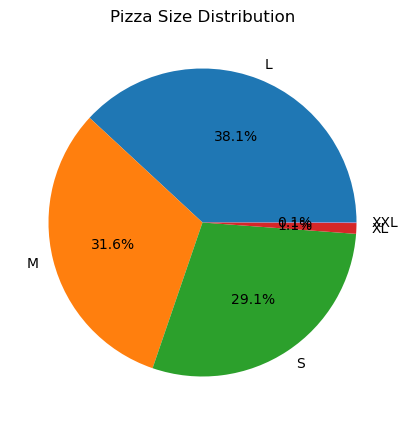

In [87]:
plt.figure(figsize=(8, 5))
size_counts = df['pizza_size'].value_counts()
size_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pizza Size Distribution')
plt.ylabel('')
plt.show()

In [ ]:
# Display the distribution of data based on the quartiles and potential outliers.
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.boxplot(data=df[numeric_columns.columns])
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot of Numeric Columns')
plt.xlabel('Columns')
plt.ylabel('Values of each column')
plt.grid(True)

# Calculate and plot the mean
mean_values = df[numeric_columns.columns].mean().values
plt.plot(range(len(mean_values)), mean_values, marker='o', markerfacecolor='white', markersize=6, markeredgecolor='black', linestyle='', label='Mean')

plt.legend()  # Show legend for mean marker
plt.show()

In [ ]:
# Detect outliers using IQR (Interquartile Range)
Q1 = df['total_price'].quantile(0.25)
Q3 = df['total_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['total_price'] < Q1 - 1.5 * IQR) | (df['total_price'] > Q3 + 1.5 * IQR)]

#to show all outliers
outliers